In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

In [3]:
BASE_PATH = "TOMATO DISEASES/tomato"
IMAGE_SIZE = 128

In [5]:
X = []
y = []

def load_images(split):
    split_path = os.path.join(BASE_PATH, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_file in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            X.append(img)
            y.append(class_name)

load_images("train")
load_images("val")

Loading Tomato___Septoria_leaf_spot: 100%|██████████| 1000/1000 [00:12<00:00, 83.06it/s]
Loading Tomato___Spider_mites Two-spotted_spider_mite: 100%|██████████| 1000/1000 [00:11<00:00, 83.36it/s]
Loading Tomato___Septoria_leaf_spot: 100%|██████████| 100/100 [00:01<00:00, 89.63it/s]
Loading Tomato___Spider_mites Two-spotted_spider_mite: 100%|██████████| 100/100 [00:00<00:00, 104.21it/s]
Loading Tomato___Tomato_Yellow_Leaf_Curl_Virus: 100%|██████████| 100/100 [00:01<00:00, 93.80it/s]


In [7]:
from collections import Counter

class_counts = Counter(y)

print("Number of images for each class:\n")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Number of images for each class:

Tomato___Bacterial_spot: 1100 images
Tomato___Early_blight: 1100 images
Tomato___healthy: 1100 images
Tomato___Late_blight: 1100 images
Tomato___Leaf_Mold: 1100 images
Tomato___Septoria_leaf_spot: 1100 images
Tomato___Spider_mites Two-spotted_spider_mite: 1100 images
Tomato___Target_Spot: 1100 images
Tomato___Tomato_mosaic_virus: 1100 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1100 images


In [9]:
X = np.array(X, dtype=np.float32) / 255.0  
y = np.array(y)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.3, random_state=42, stratify=y_encoded
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 49s 189ms/step - accuracy: 0.3073 - loss: 1.9249 - val_accuracy: 0.7130 - val_loss: 0.9264
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 38s 175ms/step - accuracy: 0.7001 - loss: 0.8690 - val_accuracy: 0.7455 - val_loss: 0.7435
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 38s 173ms/step - accuracy: 0.7745 - loss: 0.6556 - val_accuracy: 0.8260 - val_loss: 0.4856
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.8331 - loss: 0.4800 - val_accuracy: 0.8416 - val_loss: 0.4413
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.8458 - loss: 0.4536 - val_accuracy: 0.8805 - val_loss: 0.3326
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 38s 177ms/step - accuracy: 0.8814 - loss: 0.3495 - val_accuracy: 0.8714 - val_loss: 0.3296
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.8960 - loss: 0.2970 - val_accuracy: 0.8688 - val_loss: 0.3815
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.9014 - loss: 0

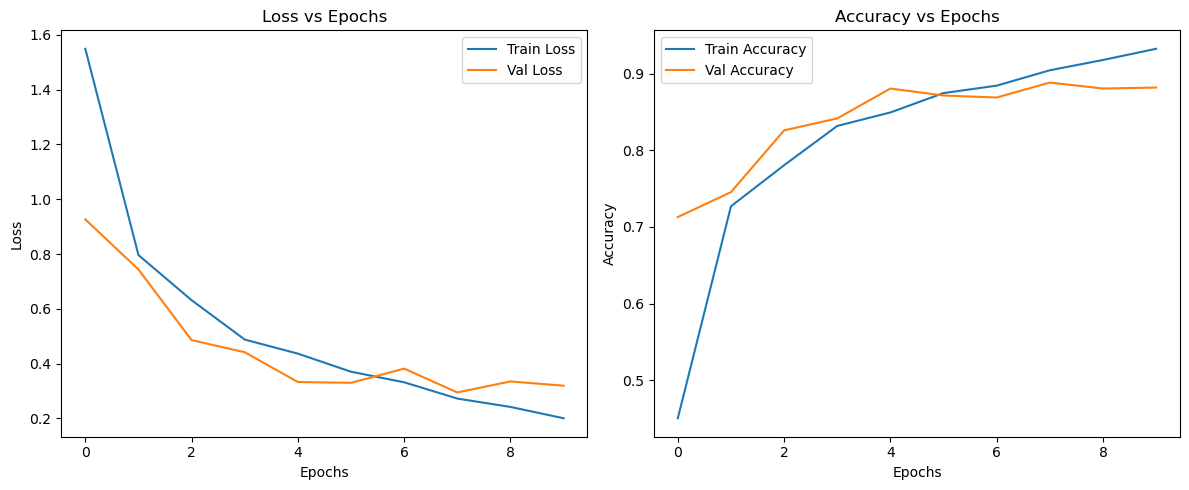

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

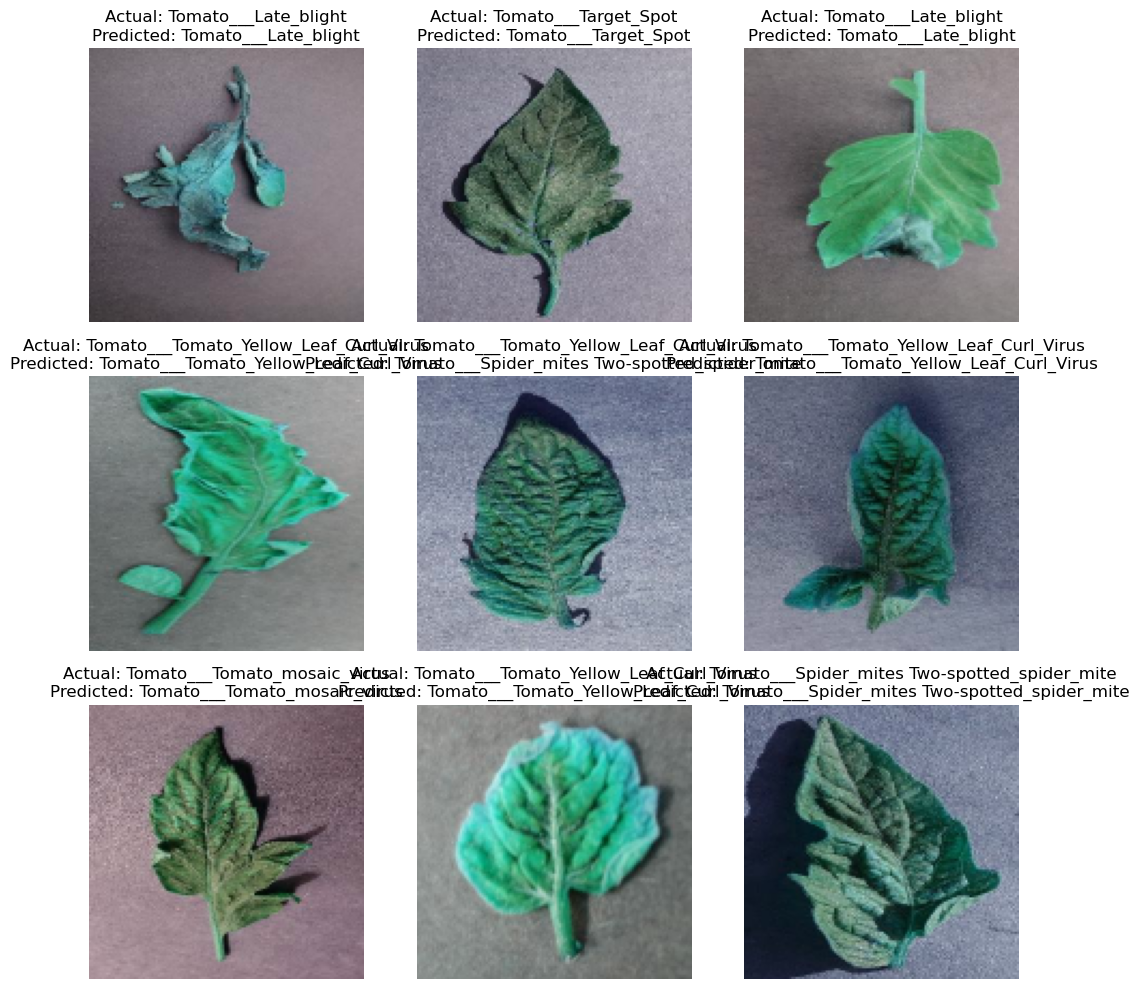

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(0, len(X_test))
    img = X_test[index]
    true_label = le.classes_[np.argmax(y_test[index])]
    pred_label = le.classes_[np.argmax(y_pred_probs[index])]
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {true_label}\nPredicted: {pred_label}")

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [19]:
y_true_binary = label_binarize(y_true, classes=range(len(le.classes_)))

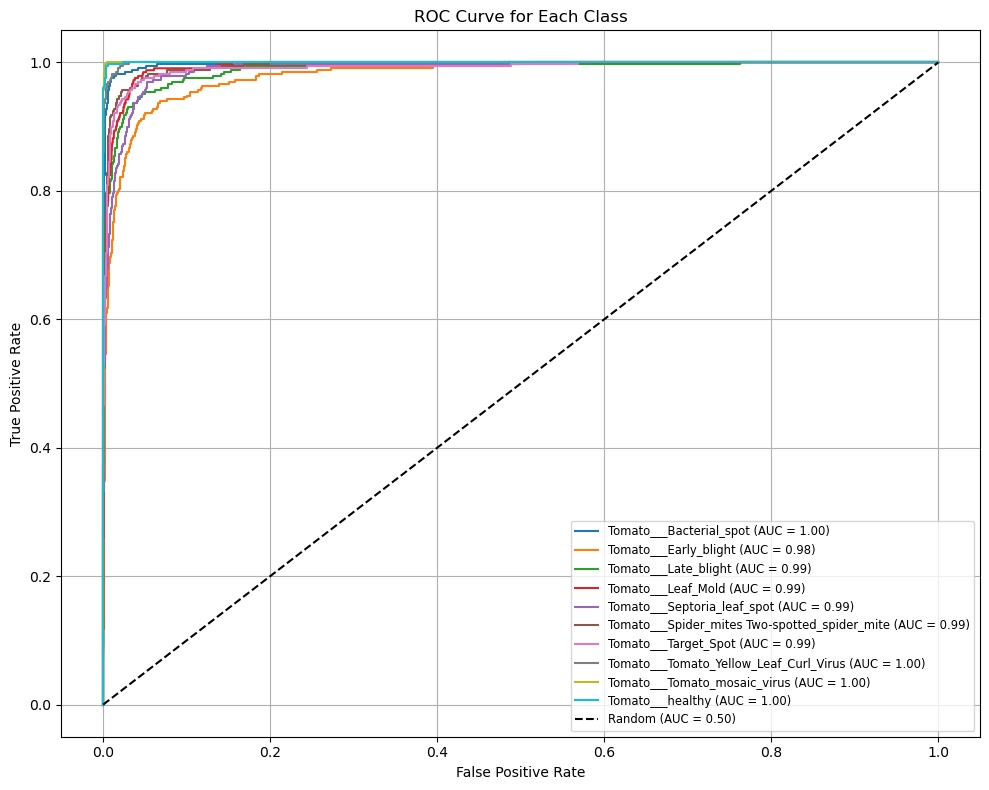

In [21]:
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_true_binary[:, i], y_pred_probs[:, i])
    auc_score = auc(fpr, tpr)
    label = f"{le.classes_[i]} (AUC = {auc_score:.2f})"
    plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right', fontsize='small', framealpha=0.8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
y_pred_probs = model.predict(X_test)  
y_pred = np.argmax(y_pred_probs, axis=1)  
y_true = np.argmax(y_test, axis=1)  
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step


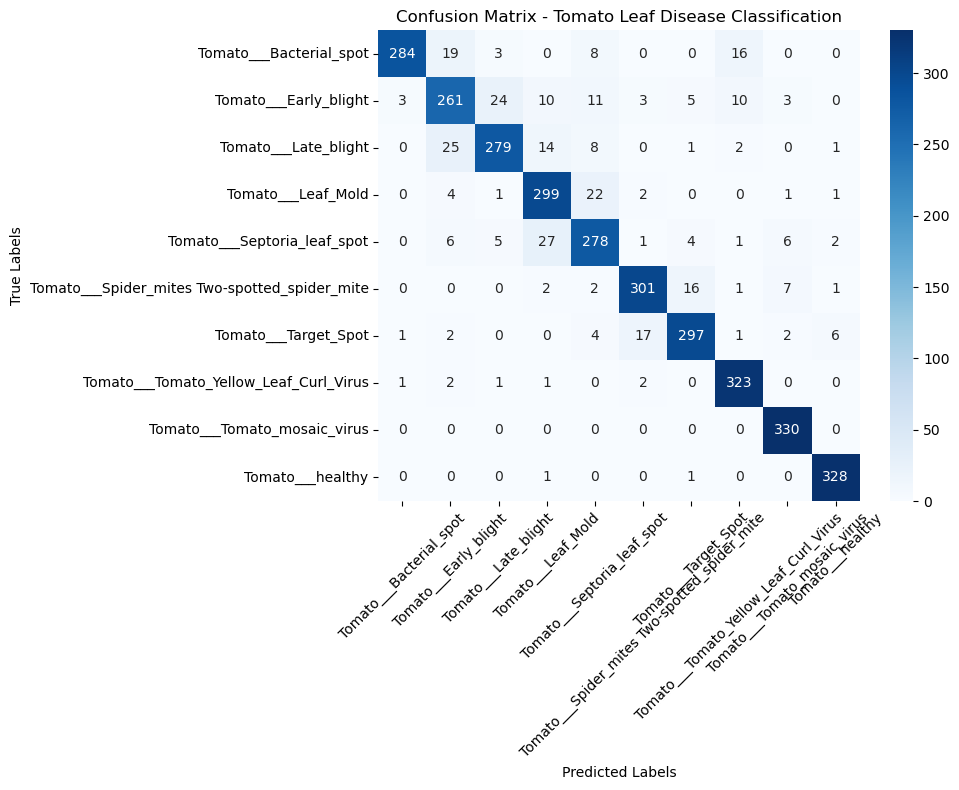

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Tomato Leaf Disease Classification')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()